## Initial

In [27]:
import tensorflow as tf
import os

In [28]:
data_dir = 'data'

In [29]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=2)

Found 42 files belonging to 2 classes.


In [32]:
data=data.map(lambda x,y:(x/255, y))
data_iterator = data.as_numpy_iterator()

In [33]:
batch = data_iterator.next()

In [34]:
# print(batch)
print(len(batch))

2


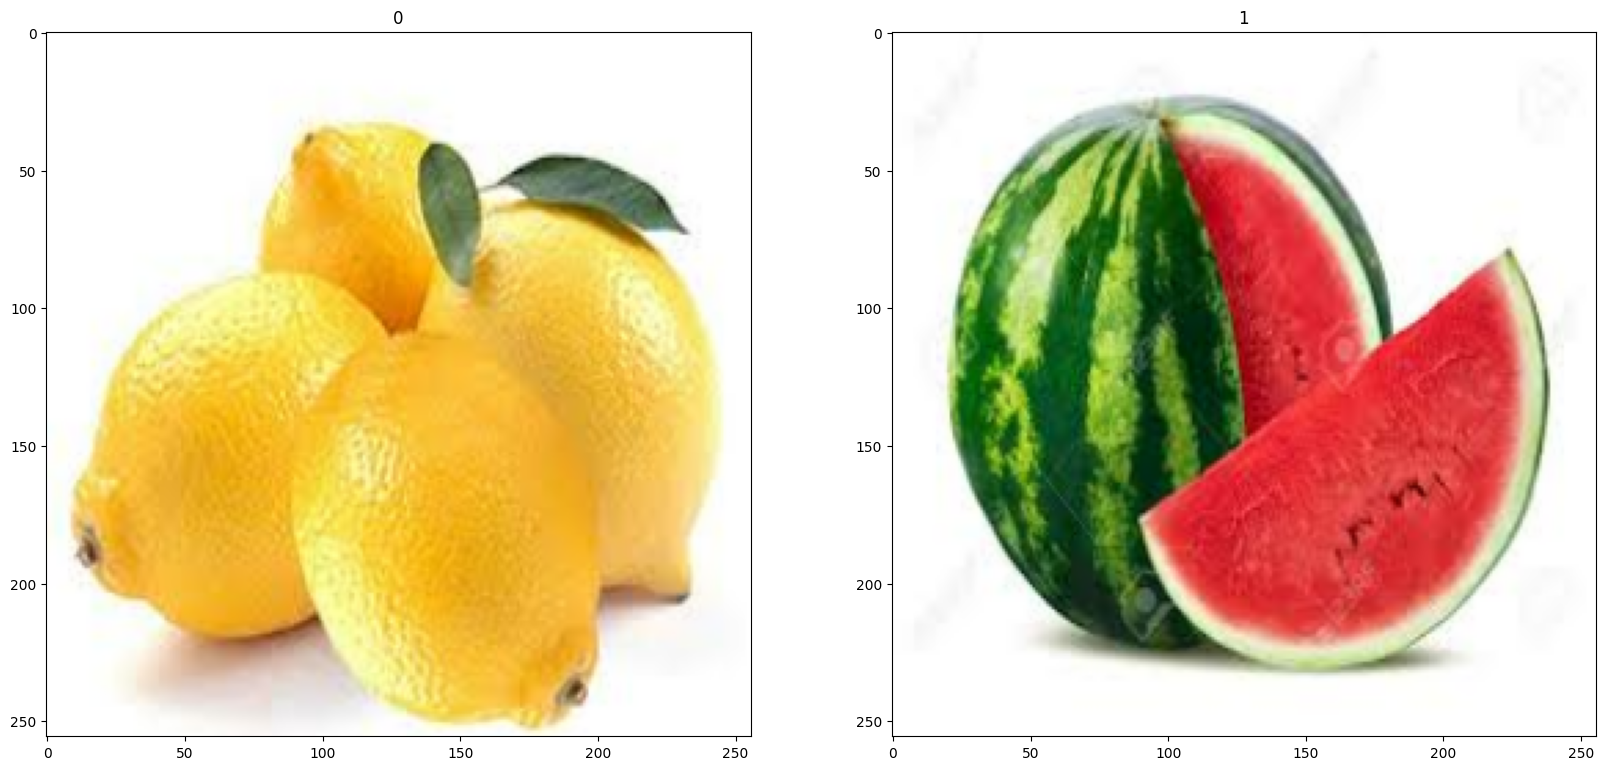

In [24]:
# 0 lemon, 1 melon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, figsize=(20,20))
for idx, img in enumerate(batch[0]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [12]:
train_size=int(len(data)*0.6)+2
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.2)
print(train_size, val_size, test_size)

14 5 4


In [13]:
train_data=data.take(train_size)
val_data=data.skip(train_size).take(val_size)
test_data=data.skip(train_size+val_size).take(test_size)

## Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [15]:
model = Sequential()
model.add( Conv2D( 16, (3,3), 1, activation ='relu', input_shape = (256,256,3) ) )
model.add(MaxPooling2D())

model.add( Conv2D(32, (3,3), 1, activation ='relu') )
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Murugesh JLP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
res = model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.5071 - loss: 1.1158 - val_accuracy: 0.7000 - val_loss: 0.5909
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.8350 - loss: 0.5636 - val_accuracy: 0.9000 - val_loss: 0.3196
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.8064 - loss: 0.4125 - val_accuracy: 0.6000 - val_loss: 0.7326
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.7996 - loss: 0.8708 - val_accuracy: 1.0000 - val_loss: 0.2321
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.8563 - loss: 0.3734 - val_accuracy: 0.9000 - val_loss: 0.3385
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8546 - loss: 0.2910 - val_accuracy: 0.9000 - val_loss: 0.1221
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9392 - loss: 0.1156 - val_accuracy: 0.9000 - val_loss: 0.2122
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8745 - loss: 0.3860 - val_accuracy: 1.000

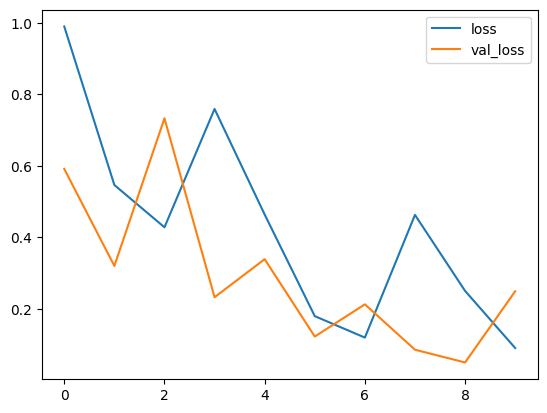

In [19]:
plt.plot(res.history['loss'], label='loss')
plt.plot(res.history['val_loss'], label='val_loss')
plt.legend()

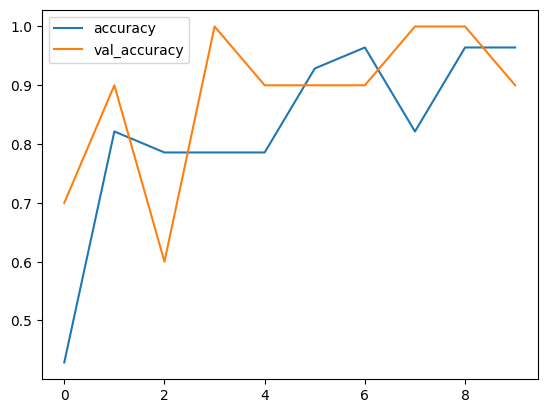

In [20]:
plt.plot(res.history['accuracy'], label='accuracy')
plt.plot(res.history['val_accuracy'], label='val_accuracy')
plt.legend()

## Perfomance Metrics

In [21]:
from tensorflow.keras.metrics import Precision, Recall, F1Score, BinaryAccuracy
pre=Precision()
rec=Recall()
f1=F1Score()
acc=BinaryAccuracy()

In [22]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    y = y.reshape(-1, 1)  # Reshape y to (batch_size, 1)
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    f1.update_state(y, yhat)
    acc.update_state(y, yhat)
print('Precision:', pre.result().numpy())
print('Recall:', rec.result().numpy())
print('F1:', f1.result().numpy())
print('Accuracy:', acc.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Precision: 0.0
Recall: 0.0
F1: [0.39999995]
Accuracy: 0.75
